### BMI 예제-1: Tensorflow

- SVM으로 BMI 판정
- 키의 최대값은 200cm, 몸무게의 최대값은 100kg으로 정규화
- 저체중(thin), 정상(normal), 비만(fat) 레이블을 one-hot-encoding [1, 0, 0], [0, 1, 0], [0, 0, 1]로 변환
- 소프트 맥스 회귀방법 , 오차 함수는 교차 엔트로피 사용
- 교차 엔트로피  - 2개의 확률 분포 사이에 정의되는 척도로서 교차 엔트로피 값이 작을 수록 정확한 값을 냄
- 학습 계수 0.01, 경사 하강법(steepest descent method) 사용

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('./dataset/bmi.csv')

In [10]:
df

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat
...,...,...,...
19995,122,58,fat
19996,193,69,normal
19997,193,37,thin
19998,195,51,thin


In [11]:
#키와 몸무게 정규화
df['height'] = df['height'] / 200
df['weight'] = df['weight'] / 100

In [12]:
df

,height,weight,label
0,0.710,0.62,fat
1,0.710,0.73,fat
2,0.885,0.61,normal
3,0.935,0.48,thin
4,0.765,0.60,fat
...,...,...,...
19995,0.610,0.58,fat
19996,0.965,0.69,normal
19997,0.965,0.37,thin
19998,0.975,0.51,thin


In [13]:
#label one-hot encoding
bclass = {'thin': [1, 0, 0], 'normal': [0, 1, 0], 'fat': [0, 0, 1]}
df["label_pat"] = df['label'].apply(lambda x: np.array(bclass[x]))

In [14]:
df

,height,weight,label,label_pat
0,0.710,0.62,fat,"[0, 0, 1]"
1,0.710,0.73,fat,"[0, 0, 1]"
2,0.885,0.61,normal,"[0, 1, 0]"
3,0.935,0.48,thin,"[1, 0, 0]"
4,0.765,0.60,fat,"[0, 0, 1]"
...,...,...,...,...
19995,0.610,0.58,fat,"[0, 0, 1]"
19996,0.965,0.69,normal,"[0, 1, 0]"
19997,0.965,0.37,thin,"[1, 0, 0]"
19998,0.975,0.51,thin,"[1, 0, 0]"


In [15]:
#학습데이터와 테스트데이터 분류
test_df = df[15000:20000]
test_pat = test_df[['weight', 'height']]
test_ans = list(test_df['label_pat'])

In [18]:
#키, 몸무게 데이터 담을 placeholder 선언
X = tf.placeholder(tf.float32, [None, 2])

#정답 레이블 데이터 담을 placeholder 선언
Y = tf.placeholder(tf.float32, [None, 3])

W = tf.Variable(tf.zeros([2, 3]))
b = tf.Variable(tf.zeros([3]))

In [25]:
#소프트맥스 회귀 정의
y = tf.nn.softmax(tf.matmul(X, W) + b)

#오차함수 - 교차 엔트로피
cross_entropy = - tf.reduce_sum(Y * tf.log(y))

#경사하강법으로 학습
train = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

In [26]:
#예측값, 정답률 계산
predict = tf.equal(tf.argmax(y, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(predict, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(3501):
    i = (step * 100) % 14000
    rows = df[i+1:i+1+10]
    x_pat = rows[['weight', 'height']]
    y_ans = list(rows['label_pat'])
    sess.run(train, feed_dict = {X: x_pat , Y: y_ans})
    if step%500 == 0:
        cre = sess.run(cross_entropy, feed_dict = {X: x_pat , Y: y_ans})
        acc = sess.run(accuracy, feed_dict = {X: test_pat , Y: test_ans})
        print("Epoch =", step, "오차 =", cre, "정확률(평균) =", acc)

Epoch = 0 오차 = 10.879755 정확률(평균) = 0.3242
Epoch = 500 오차 = 9.523629 정확률(평균) = 0.7582
Epoch = 1000 오차 = 8.295139 정확률(평균) = 0.8692
Epoch = 1500 오차 = 8.873865 정확률(평균) = 0.7244
Epoch = 2000 오차 = 7.7415376 정확률(평균) = 0.848
Epoch = 2500 오차 = 7.44711 정확률(평균) = 0.7228
Epoch = 3000 오차 = 6.0019903 정확률(평균) = 0.9058
Epoch = 3500 오차 = 6.1349783 정확률(평균) = 0.811


### BMI 예제-2: Keras

In [28]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [53]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping

In [32]:
df = pd.read_csv('./dataset/bmi.csv')
df['height'] /= 200
df['weight'] /= 100

In [35]:
X = df[['weight', 'height']].as_matrix()

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [36]:
X

array([[0.62 , 0.71 ],
       [0.73 , 0.71 ],
       [0.61 , 0.885],
       ...,
       [0.37 , 0.965],
       [0.51 , 0.975],
       [0.67 , 0.815]])

In [40]:
#label 컬럼 변환
bclass = {'thin': [1, 0, 0], 'normal':[0, 1, 0], 'fat':[0, 0, 1]}

Y = np.empty((20000, 3))
for i, v in enumerate(df['label']):
    Y[i] = bclass[v]

In [41]:
#학습데이터, 테스트데이터 분리
X_train, Y_train = X[1:15001], Y[1:15001]
X_test, Y_test = X[15001:], Y[15001:]

In [50]:
? model.add

In [70]:
#모델 객체 생성
model = Sequential()
model.add(Dense(512, input_shape = (2, )))     #Dense(노드 수, ...) 층을 의미하는 객체
model.add(Activation('relu'))               #활성화 함수
model.add(Dropout(0.1))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
hist = model.fit(X_train, Y_train, batch_size = 100, epochs = 20, validation_split = 0.1, callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2)], verbose = 1)

score = model.evaluate(X_test, Y_test)
print("loss=", score[0])
print("accuracy=", score[1])

Train on 13500 samples, validate on 1500 samples
Epoch 1/20
13500/13500 [==============================] - 1s 67us/step - loss: 0.5153 - accuracy: 0.7939 - val_loss: 0.2838 - val_accuracy: 0.9047
Epoch 2/20
13500/13500 [==============================] - 1s 55us/step - loss: 0.2586 - accuracy: 0.8974 - val_loss: 0.1571 - val_accuracy: 0.9740
Epoch 3/20
13500/13500 [==============================] - 1s 55us/step - loss: 0.1958 - accuracy: 0.9166 - val_loss: 0.1465 - val_accuracy: 0.9380
Epoch 4/20
13500/13500 [==============================] - 1s 55us/step - loss: 0.1716 - accuracy: 0.9246 - val_loss: 0.1083 - val_accuracy: 0.9627
Epoch 5/20
13500/13500 [==============================] - 1s 55us/step - loss: 0.1580 - accuracy: 0.9337 - val_loss: 0.0888 - val_accuracy: 0.9780
Epoch 6/20
13500/13500 [==============================] - 1s 55us/step - loss: 0.1484 - accuracy: 0.9355 - val_loss: 0.1202 - val_accuracy: 0.9413
Epoch 7/20
13500/13500 [==============================] - 1s 55us/ste

### 과적합 문제를 해결하는 법
- weight decay( 가중치 감소) - 학습중 가중치가 큰 것에 대해서 패널티를 부과해 과적합의 위험을 줄이는 방법
- Dropout - 복잡한 신경망에서 가중치 감소만으로 과적합을 피하기 어려운 경우 뉴런의 연결을 임의로 삭제시켜 신호를 전달하지 못하도록 하는 방법

- softmax 회귀 - 입력받은 값을 출력으로 0~1사이의 값으로 모두 정규화하여 출력값들의 총합은 항상 1이 되는 특성의 함수
    - 분류하고 싶은 클래스 수 만큼 출력으로 구성

### 폐암 환자 생존율 예측 예제

In [72]:
import numpy as np

In [74]:
#시드 설정: 출력할 때마다 같은 결과를 출력하기 위해
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [77]:
#데이터 불러오기
Data_set = np.loadtxt("./dataset/ThoraricSurgery.csv", delimiter = ",")

In [78]:
#환자 정보와 수술 결과 분류하여 저장
X = Data_set[:, 0:17]
Y = Data_set[:, 17]

In [79]:
#딥러닝 구조를 결정
model = Sequential()

#첫번째 은닉층에 input_dim을 적어줌으로써 첫번째 Dense가 은닉층 + 입력층의 역할을 겸함
#데이터에서 17개 값을 받아 은닉층의 30개 노드로 보낸다
model.add(Dense(30, input_dim = 17, activation = 'relu'))    #activation: 출력층으로 전달할 때 사용할 활성화 함수
model.add(Dense(1, activation = 'sigmoid'))    #출력층의 노드 수는 1개, 최종 출력값에 사용될 활성화 함수

In [86]:
#딥러닝 실행 (오차 함수: 평균 제곱 오차 함수)
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X, Y, epochs = 30, batch_size = 10)

#결과 출력
print('\n Accuracy: %.4f' % (model.evaluate(X, Y)[1]))

Epoch 1/30
470/470 [==============================] - 0s 338us/step - loss: 0.1305 - accuracy: 0.8447
Epoch 2/30
470/470 [==============================] - 0s 90us/step - loss: 0.1248 - accuracy: 0.8574
Epoch 3/30
470/470 [==============================] - 0s 73us/step - loss: 0.1223 - accuracy: 0.8638
Epoch 4/30
470/470 [==============================] - 0s 76us/step - loss: 0.1323 - accuracy: 0.8532
Epoch 5/30
470/470 [==============================] - 0s 75us/step - loss: 0.1361 - accuracy: 0.8574
Epoch 6/30
470/470 [==============================] - 0s 75us/step - loss: 0.1296 - accuracy: 0.8596
Epoch 7/30
470/470 [==============================] - 0s 76us/step - loss: 0.1382 - accuracy: 0.8468
Epoch 8/30
470/470 [==============================] - 0s 79us/step - loss: 0.1397 - accuracy: 0.8574
Epoch 9/30
470/470 [==============================] - 0s 80us/step - loss: 0.1349 - accuracy: 0.8617
Epoch 10/30
470/470 [==============================] - 0s 82us/step - loss: 0.1265 - accur

## 피마 인디언 당뇨 예제 (이항 분류 분석)

In [87]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
import tensorflow as tf

In [88]:
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

In [ ]:
dataset = numpy.loadtxt('./dataset/pima-indians-diabetes.csv', delimiter = ',')
X = dataset[:, 0:8]
Y = dataset[:, 8]


## 초음파 광물 예측 예제

In [101]:
df = pd.read_csv('./dataset/sonar.csv', header = None)
dataset = df.values

X = dataset[:, 0:60]
Y_obj = dataset[:, 60]
print(Y_obj.unique())

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [102]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [96]:
e = LabelEncoder()    #one-hot encoding
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [98]:
model = Sequential()
model.add(Dense(24, input_dim = 60, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

In [100]:
hist = model.fit(X, Y, epochs = 200, batch_size = 5)
print(hist)
print('\n Accuracy: %.4f' % (model.evaluate(X, Y)[1]))
#---> 과적합 발생

Epoch 1/200
208/208 [==============================] - 0s 218us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 2/200
208/208 [==============================] - 0s 204us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 3/200
208/208 [==============================] - 0s 174us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 4/200
208/208 [==============================] - 0s 183us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 5/200
208/208 [==============================] - 0s 183us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 6/200
208/208 [==============================] - 0s 183us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 7/200
208/208 [==============================] - 0s 186us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 8/200
208/208 [==============================] - 0s 175us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 9/200
208/208 [==============================] - 0s 178us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 10/200
208/208 [==============================] - 0s 186us/step - l

208/208 [==============================] - 0s 180us/step - loss: 1.7376e-04 - accuracy: 1.0000
Epoch 78/200
208/208 [==============================] - 0s 184us/step - loss: 1.6479e-04 - accuracy: 1.0000
Epoch 79/200
208/208 [==============================] - 0s 179us/step - loss: 2.1276e-04 - accuracy: 1.0000
Epoch 80/200
208/208 [==============================] - ETA: 0s - loss: 1.5572e-04 - accuracy: 1.00 - 0s 173us/step - loss: 1.5715e-04 - accuracy: 1.0000
Epoch 81/200
208/208 [==============================] - 0s 172us/step - loss: 1.7176e-04 - accuracy: 1.0000
Epoch 82/200
208/208 [==============================] - 0s 168us/step - loss: 2.3860e-04 - accuracy: 1.0000
Epoch 83/200
208/208 [==============================] - 0s 177us/step - loss: 1.4066e-04 - accuracy: 1.0000
Epoch 84/200
208/208 [==============================] - 0s 177us/step - loss: 1.4405e-04 - accuracy: 1.0000
Epoch 85/200
208/208 [==============================] - 0s 177us/step - loss: 1.4006e-04 - accuracy: 1.

208/208 [==============================] - 0s 178us/step - loss: 3.8050e-05 - accuracy: 1.0000
Epoch 152/200
208/208 [==============================] - 0s 183us/step - loss: 2.6125e-05 - accuracy: 1.0000
Epoch 153/200
208/208 [==============================] - 0s 176us/step - loss: 2.2745e-05 - accuracy: 1.0000
Epoch 154/200
208/208 [==============================] - 0s 177us/step - loss: 2.2065e-05 - accuracy: 1.0000
Epoch 155/200
208/208 [==============================] - 0s 176us/step - loss: 2.1822e-05 - accuracy: 1.0000
Epoch 156/200
208/208 [==============================] - 0s 173us/step - loss: 2.2275e-05 - accuracy: 1.0000
Epoch 157/200
208/208 [==============================] - 0s 176us/step - loss: 2.2179e-05 - accuracy: 1.0000
Epoch 158/200
208/208 [==============================] - 0s 181us/step - loss: 1.9775e-05 - accuracy: 1.0000
Epoch 159/200
208/208 [==============================] - 0s 179us/step - loss: 2.0677e-05 - accuracy: 1.0000
Epoch 160/200
208/208 [==========

In [105]:
#학습데이터와 테스트데이터 분류하여 다시 실행
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = seed)

model = Sequential()
model.add(Dense(24, input_dim = 60, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs = 130, batch_size = 5)

print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))


Epoch 1/130
145/145 [==============================] - 0s 1ms/step - loss: 0.2508 - accuracy: 0.5379
Epoch 2/130
145/145 [==============================] - 0s 189us/step - loss: 0.2410 - accuracy: 0.6000
Epoch 3/130
145/145 [==============================] - 0s 179us/step - loss: 0.2333 - accuracy: 0.6138
Epoch 4/130
145/145 [==============================] - 0s 184us/step - loss: 0.2290 - accuracy: 0.6414
Epoch 5/130
145/145 [==============================] - 0s 193us/step - loss: 0.2233 - accuracy: 0.6828
Epoch 6/130
145/145 [==============================] - 0s 169us/step - loss: 0.2125 - accuracy: 0.6621
Epoch 7/130
145/145 [==============================] - 0s 175us/step - loss: 0.2095 - accuracy: 0.7379
Epoch 8/130
145/145 [==============================] - 0s 187us/step - loss: 0.1984 - accuracy: 0.7379
Epoch 9/130
145/145 [==============================] - 0s 192us/step - loss: 0.1947 - accuracy: 0.7724
Epoch 10/130
145/145 [==============================] - 0s 194us/step - los

145/145 [==============================] - 0s 178us/step - loss: 0.0277 - accuracy: 0.9793
Epoch 80/130
145/145 [==============================] - 0s 173us/step - loss: 0.0262 - accuracy: 0.9793
Epoch 81/130
145/145 [==============================] - 0s 172us/step - loss: 0.0262 - accuracy: 0.9724
Epoch 82/130
145/145 [==============================] - 0s 170us/step - loss: 0.0260 - accuracy: 0.9655
Epoch 83/130
145/145 [==============================] - 0s 179us/step - loss: 0.0264 - accuracy: 0.9724
Epoch 84/130
145/145 [==============================] - 0s 171us/step - loss: 0.0241 - accuracy: 0.9724
Epoch 85/130
145/145 [==============================] - 0s 180us/step - loss: 0.0246 - accuracy: 0.9793
Epoch 86/130
145/145 [==============================] - 0s 178us/step - loss: 0.0316 - accuracy: 0.9586
Epoch 87/130
145/145 [==============================] - 0s 184us/step - loss: 0.0229 - accuracy: 0.9862
Epoch 88/130
145/145 [==============================] - 0s 184us/step - loss:

In [108]:
from keras.models import load_model

In [111]:
#모델 저장
model.save('./output/my_model.h5')

del model   #테스트를 위해 메모리 내의 모델을 삭제

model = load_model('./output/my_model.h5')    #모델을 새로 불러옴

print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))    #정상적으로 작동하는지 확인

63/63 [==============================] - 0s 2ms/step

 Test Accuracy: 0.8095


## k겹 교차 검증 
- 데이터 샘플이 작은 경우

In [112]:
from sklearn.model_selection import StratifiedKFold

In [114]:
n_fold = 10
skf = StratifiedKFold(n_splits = n_fold, shuffle = True, random_state = seed)

In [116]:
accuracy = []

In [119]:
for train, test in skf.split(X, Y):
    model = Sequential()
    model.add(Dense(24, input_dim = 60, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])
    k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test])[1])
    accuracy.append(k_accuracy)
    
# 결과 출력
print("\n %.f fold accuracy:" % n_fold, accuracy)

20/20 [==============================] - 0s 7ms/step

 10 fold accuracy: ['0.5000', '0.5714', '0.5714', '0.5714', '0.4286', '0.5238', '0.4762', '0.5500', '0.4500', '0.5500', '0.5909', '0.5238', '0.4762', '0.4762', '0.4286', '0.5238', '0.6190', '0.4500', '0.6000', '0.4000']


### 오차와 정확도 시각화

Train on 653 samples, validate on 322 samples
Epoch 1/3500
653/653 [==============================] - 0s 635us/step - loss: 0.5533 - accuracy: 0.7596 - val_loss: 0.4723 - val_accuracy: 0.7826
Epoch 2/3500
653/653 [==============================] - 0s 9us/step - loss: 0.4956 - accuracy: 0.7596 - val_loss: 0.4377 - val_accuracy: 0.7826
Epoch 3/3500
653/653 [==============================] - 0s 14us/step - loss: 0.4585 - accuracy: 0.7580 - val_loss: 0.4168 - val_accuracy: 0.7764
Epoch 4/3500
653/653 [==============================] - 0s 12us/step - loss: 0.4312 - accuracy: 0.7596 - val_loss: 0.4066 - val_accuracy: 0.7702
Epoch 5/3500
653/653 [==============================] - 0s 11us/step - loss: 0.4147 - accuracy: 0.7534 - val_loss: 0.3915 - val_accuracy: 0.7795
Epoch 6/3500
653/653 [==============================] - 0s 14us/step - loss: 0.3958 - accuracy: 0.7642 - val_loss: 0.3725 - val_accuracy: 0.7919
Epoch 7/3500
653/653 [==============================] - 0s 12us/step - loss: 0.3810 

Epoch 57/3500
653/653 [==============================] - 0s 14us/step - loss: 0.2028 - accuracy: 0.9296 - val_loss: 0.1967 - val_accuracy: 0.9441
Epoch 58/3500
653/653 [==============================] - 0s 11us/step - loss: 0.2023 - accuracy: 0.9280 - val_loss: 0.1957 - val_accuracy: 0.9441
Epoch 59/3500
653/653 [==============================] - 0s 12us/step - loss: 0.2016 - accuracy: 0.9280 - val_loss: 0.1953 - val_accuracy: 0.9503
Epoch 60/3500
653/653 [==============================] - 0s 12us/step - loss: 0.2013 - accuracy: 0.9280 - val_loss: 0.1943 - val_accuracy: 0.9503
Epoch 61/3500
653/653 [==============================] - 0s 14us/step - loss: 0.2007 - accuracy: 0.9280 - val_loss: 0.1942 - val_accuracy: 0.9441
Epoch 62/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1995 - accuracy: 0.9296 - val_loss: 0.1933 - val_accuracy: 0.9472
Epoch 63/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1992 - accuracy: 0.9280 - val_loss: 0.1929 -

653/653 [==============================] - 0s 14us/step - loss: 0.1781 - accuracy: 0.9326 - val_loss: 0.1830 - val_accuracy: 0.9472
Epoch 114/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1831 - accuracy: 0.9342 - val_loss: 0.1844 - val_accuracy: 0.9441
Epoch 115/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1836 - accuracy: 0.9342 - val_loss: 0.1789 - val_accuracy: 0.9472
Epoch 116/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1788 - accuracy: 0.9342 - val_loss: 0.1736 - val_accuracy: 0.9503
Epoch 117/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1768 - accuracy: 0.9387 - val_loss: 0.1763 - val_accuracy: 0.9503
Epoch 118/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1820 - accuracy: 0.9357 - val_loss: 0.1737 - val_accuracy: 0.9503
Epoch 119/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1773 - accuracy: 0.9372 - val_loss: 0.1757 - val_acc

Epoch 169/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1577 - accuracy: 0.9357 - val_loss: 0.1573 - val_accuracy: 0.9472
Epoch 170/3500
653/653 [==============================] - 0s 9us/step - loss: 0.1590 - accuracy: 0.9326 - val_loss: 0.1575 - val_accuracy: 0.9441
Epoch 171/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1581 - accuracy: 0.9326 - val_loss: 0.1538 - val_accuracy: 0.9503
Epoch 172/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1578 - accuracy: 0.9387 - val_loss: 0.1533 - val_accuracy: 0.9503
Epoch 173/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1562 - accuracy: 0.9387 - val_loss: 0.1559 - val_accuracy: 0.9472
Epoch 174/3500
653/653 [==============================] - 0s 10us/step - loss: 0.1565 - accuracy: 0.9326 - val_loss: 0.1607 - val_accuracy: 0.9503
Epoch 175/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1605 - accuracy: 0.9342 - val_loss: 0.

Epoch 225/3500
653/653 [==============================] - 0s 9us/step - loss: 0.1423 - accuracy: 0.9495 - val_loss: 0.1360 - val_accuracy: 0.9534
Epoch 226/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1378 - accuracy: 0.9372 - val_loss: 0.1424 - val_accuracy: 0.9503
Epoch 227/3500
653/653 [==============================] - 0s 9us/step - loss: 0.1408 - accuracy: 0.9372 - val_loss: 0.1407 - val_accuracy: 0.9503
Epoch 228/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1386 - accuracy: 0.9372 - val_loss: 0.1336 - val_accuracy: 0.9534
Epoch 229/3500
653/653 [==============================] - 0s 9us/step - loss: 0.1371 - accuracy: 0.9433 - val_loss: 0.1336 - val_accuracy: 0.9503
Epoch 230/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1421 - accuracy: 0.9449 - val_loss: 0.1319 - val_accuracy: 0.9503
Epoch 231/3500
653/653 [==============================] - 0s 9us/step - loss: 0.1382 - accuracy: 0.9464 - val_loss: 0.133

Epoch 281/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1210 - accuracy: 0.9403 - val_loss: 0.1168 - val_accuracy: 0.9534
Epoch 282/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1218 - accuracy: 0.9479 - val_loss: 0.1163 - val_accuracy: 0.9534
Epoch 283/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1202 - accuracy: 0.9449 - val_loss: 0.1205 - val_accuracy: 0.9534
Epoch 284/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1208 - accuracy: 0.9403 - val_loss: 0.1210 - val_accuracy: 0.9534
Epoch 285/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1210 - accuracy: 0.9403 - val_loss: 0.1168 - val_accuracy: 0.9534
Epoch 286/3500
653/653 [==============================] - 0s 14us/step - loss: 0.1190 - accuracy: 0.9464 - val_loss: 0.1138 - val_accuracy: 0.9534
Epoch 287/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1206 - accuracy: 0.9464 - val_loss: 0

Epoch 337/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1067 - accuracy: 0.9525 - val_loss: 0.1033 - val_accuracy: 0.9627
Epoch 338/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1118 - accuracy: 0.9587 - val_loss: 0.1023 - val_accuracy: 0.9627
Epoch 339/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1079 - accuracy: 0.9571 - val_loss: 0.1056 - val_accuracy: 0.9565
Epoch 340/3500
653/653 [==============================] - 0s 9us/step - loss: 0.1066 - accuracy: 0.9479 - val_loss: 0.1107 - val_accuracy: 0.9534
Epoch 341/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1076 - accuracy: 0.9433 - val_loss: 0.1032 - val_accuracy: 0.9627
Epoch 342/3500
653/653 [==============================] - 0s 8us/step - loss: 0.1042 - accuracy: 0.9525 - val_loss: 0.1006 - val_accuracy: 0.9627
Epoch 343/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1077 - accuracy: 0.9571 - val_loss: 0.1

Epoch 393/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0939 - accuracy: 0.9617 - val_loss: 0.0937 - val_accuracy: 0.9658
Epoch 394/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0934 - accuracy: 0.9602 - val_loss: 0.0919 - val_accuracy: 0.9658
Epoch 395/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0932 - accuracy: 0.9617 - val_loss: 0.0918 - val_accuracy: 0.9658
Epoch 396/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0929 - accuracy: 0.9632 - val_loss: 0.0938 - val_accuracy: 0.9689
Epoch 397/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0929 - accuracy: 0.9587 - val_loss: 0.0930 - val_accuracy: 0.9689
Epoch 398/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0926 - accuracy: 0.9617 - val_loss: 0.0912 - val_accuracy: 0.9658
Epoch 399/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0922 - accuracy: 0.9648 - val_loss: 0.090

Epoch 449/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0784 - accuracy: 0.9694 - val_loss: 0.0912 - val_accuracy: 0.9658
Epoch 450/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0795 - accuracy: 0.9694 - val_loss: 0.0834 - val_accuracy: 0.9689
Epoch 451/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0781 - accuracy: 0.9740 - val_loss: 0.0805 - val_accuracy: 0.9689
Epoch 452/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0784 - accuracy: 0.9740 - val_loss: 0.0847 - val_accuracy: 0.9658
Epoch 453/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0795 - accuracy: 0.9678 - val_loss: 0.0868 - val_accuracy: 0.9658
Epoch 454/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0794 - accuracy: 0.9724 - val_loss: 0.0809 - val_accuracy: 0.9720
Epoch 455/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0769 - accuracy: 0.9755 - val_loss: 0.

Epoch 505/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0617 - accuracy: 0.9816 - val_loss: 0.0731 - val_accuracy: 0.9720
Epoch 506/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0592 - accuracy: 0.9832 - val_loss: 0.0724 - val_accuracy: 0.9720
Epoch 507/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0588 - accuracy: 0.9816 - val_loss: 0.0741 - val_accuracy: 0.9720
Epoch 508/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0595 - accuracy: 0.9801 - val_loss: 0.0768 - val_accuracy: 0.9720
Epoch 509/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0609 - accuracy: 0.9801 - val_loss: 0.0719 - val_accuracy: 0.9720
Epoch 510/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0596 - accuracy: 0.9801 - val_loss: 0.0663 - val_accuracy: 0.9752
Epoch 511/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0606 - accuracy: 0.9801 - val_loss: 0

Epoch 561/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0588 - accuracy: 0.9755 - val_loss: 0.0707 - val_accuracy: 0.9720
Epoch 562/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0517 - accuracy: 0.9832 - val_loss: 0.0715 - val_accuracy: 0.9720
Epoch 563/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0509 - accuracy: 0.9832 - val_loss: 0.0626 - val_accuracy: 0.9752
Epoch 564/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0510 - accuracy: 0.9832 - val_loss: 0.0616 - val_accuracy: 0.9752
Epoch 565/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0532 - accuracy: 0.9816 - val_loss: 0.0655 - val_accuracy: 0.9720
Epoch 566/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0508 - accuracy: 0.9816 - val_loss: 0.0707 - val_accuracy: 0.9720
Epoch 567/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0500 - accuracy: 0.9816 - val_loss: 0.0

Epoch 617/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0435 - accuracy: 0.9862 - val_loss: 0.0554 - val_accuracy: 0.9752
Epoch 618/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0459 - accuracy: 0.9832 - val_loss: 0.0575 - val_accuracy: 0.9752
Epoch 619/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0439 - accuracy: 0.9862 - val_loss: 0.0655 - val_accuracy: 0.9720
Epoch 620/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0446 - accuracy: 0.9862 - val_loss: 0.0641 - val_accuracy: 0.9720
Epoch 621/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0434 - accuracy: 0.9847 - val_loss: 0.0618 - val_accuracy: 0.9720
Epoch 622/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0429 - accuracy: 0.9877 - val_loss: 0.0579 - val_accuracy: 0.9752
Epoch 623/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0426 - accuracy: 0.9847 - val_loss: 0.061

Epoch 673/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0401 - accuracy: 0.9877 - val_loss: 0.0530 - val_accuracy: 0.9752
Epoch 674/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0406 - accuracy: 0.9847 - val_loss: 0.0619 - val_accuracy: 0.9720
Epoch 675/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0386 - accuracy: 0.9877 - val_loss: 0.0677 - val_accuracy: 0.9752
Epoch 676/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0393 - accuracy: 0.9862 - val_loss: 0.0576 - val_accuracy: 0.9752
Epoch 677/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0388 - accuracy: 0.9877 - val_loss: 0.0562 - val_accuracy: 0.9752
Epoch 678/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0386 - accuracy: 0.9877 - val_loss: 0.0643 - val_accuracy: 0.9720
Epoch 679/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0385 - accuracy: 0.9877 - val_loss: 0.0

Epoch 729/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0355 - accuracy: 0.9893 - val_loss: 0.0835 - val_accuracy: 0.9720
Epoch 730/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0453 - accuracy: 0.9786 - val_loss: 0.0705 - val_accuracy: 0.9752
Epoch 731/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0376 - accuracy: 0.9862 - val_loss: 0.0533 - val_accuracy: 0.9783
Epoch 732/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0368 - accuracy: 0.9939 - val_loss: 0.0557 - val_accuracy: 0.9752
Epoch 733/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0363 - accuracy: 0.9908 - val_loss: 0.0639 - val_accuracy: 0.9783
Epoch 734/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0343 - accuracy: 0.9877 - val_loss: 0.0607 - val_accuracy: 0.9783
Epoch 735/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0340 - accuracy: 0.9893 - val_loss: 0.

Epoch 785/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0315 - accuracy: 0.9893 - val_loss: 0.0617 - val_accuracy: 0.9783
Epoch 786/3500
653/653 [==============================] - 0s 10us/step - loss: 0.0322 - accuracy: 0.9877 - val_loss: 0.0669 - val_accuracy: 0.9752
Epoch 787/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0339 - accuracy: 0.9877 - val_loss: 0.0586 - val_accuracy: 0.9783
Epoch 788/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0314 - accuracy: 0.9877 - val_loss: 0.0507 - val_accuracy: 0.9814
Epoch 789/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0320 - accuracy: 0.9923 - val_loss: 0.0550 - val_accuracy: 0.9814
Epoch 790/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0310 - accuracy: 0.9923 - val_loss: 0.0645 - val_accuracy: 0.9752
Epoch 791/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0331 - accuracy: 0.9877 - val_loss: 0.05

Epoch 841/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.0538 - val_accuracy: 0.9814
Epoch 842/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0291 - accuracy: 0.9923 - val_loss: 0.0517 - val_accuracy: 0.9814
Epoch 843/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0285 - accuracy: 0.9939 - val_loss: 0.0586 - val_accuracy: 0.9783
Epoch 844/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0291 - accuracy: 0.9893 - val_loss: 0.0564 - val_accuracy: 0.9814
Epoch 845/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0281 - accuracy: 0.9908 - val_loss: 0.0474 - val_accuracy: 0.9814
Epoch 846/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.0465 - val_accuracy: 0.9783
Epoch 847/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0

Epoch 897/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0340 - accuracy: 0.9893 - val_loss: 0.0592 - val_accuracy: 0.9814
Epoch 898/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0304 - accuracy: 0.9862 - val_loss: 0.0872 - val_accuracy: 0.9720
Epoch 899/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0417 - accuracy: 0.9816 - val_loss: 0.0517 - val_accuracy: 0.9814
Epoch 900/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0260 - accuracy: 0.9954 - val_loss: 0.0437 - val_accuracy: 0.9814
Epoch 901/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0368 - accuracy: 0.9893 - val_loss: 0.0540 - val_accuracy: 0.9814
Epoch 902/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0296 - accuracy: 0.9893 - val_loss: 0.0706 - val_accuracy: 0.9783
Epoch 903/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0304 - accuracy: 0.9893 - val_loss: 0.

Epoch 953/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0246 - accuracy: 0.9954 - val_loss: 0.0615 - val_accuracy: 0.9814
Epoch 954/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0257 - accuracy: 0.9923 - val_loss: 0.0633 - val_accuracy: 0.9814
Epoch 955/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0256 - accuracy: 0.9923 - val_loss: 0.0551 - val_accuracy: 0.9814
Epoch 956/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0243 - accuracy: 0.9969 - val_loss: 0.0484 - val_accuracy: 0.9845
Epoch 957/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0270 - accuracy: 0.9954 - val_loss: 0.0526 - val_accuracy: 0.9814
Epoch 958/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0248 - accuracy: 0.9969 - val_loss: 0.0638 - val_accuracy: 0.9783
Epoch 959/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0259 - accuracy: 0.9908 - val_loss: 0.06

Epoch 1009/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0240 - accuracy: 0.9923 - val_loss: 0.0539 - val_accuracy: 0.9814
Epoch 1010/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0236 - accuracy: 0.9969 - val_loss: 0.0551 - val_accuracy: 0.9814
Epoch 1011/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0230 - accuracy: 0.9969 - val_loss: 0.0602 - val_accuracy: 0.9814
Epoch 1012/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0235 - accuracy: 0.9954 - val_loss: 0.0617 - val_accuracy: 0.9814
Epoch 1013/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0242 - accuracy: 0.9954 - val_loss: 0.0610 - val_accuracy: 0.9814
Epoch 1014/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0235 - accuracy: 0.9954 - val_loss: 0.0652 - val_accuracy: 0.9814
Epoch 1015/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0246 - accuracy: 0.9908 - val_

653/653 [==============================] - 0s 12us/step - loss: 0.0225 - accuracy: 0.9969 - val_loss: 0.0643 - val_accuracy: 0.9814
Epoch 1065/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0232 - accuracy: 0.9969 - val_loss: 0.0651 - val_accuracy: 0.9814
Epoch 1066/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0224 - accuracy: 0.9969 - val_loss: 0.0684 - val_accuracy: 0.9814
Epoch 1067/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0230 - accuracy: 0.9908 - val_loss: 0.0608 - val_accuracy: 0.9814
Epoch 1068/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0225 - accuracy: 0.9939 - val_loss: 0.0542 - val_accuracy: 0.9814
Epoch 1069/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0229 - accuracy: 0.9969 - val_loss: 0.0598 - val_accuracy: 0.9814
Epoch 1070/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0226 - accuracy: 0.9923 - val_loss: 0.0702 - v

653/653 [==============================] - 0s 14us/step - loss: 0.0249 - accuracy: 0.9923 - val_loss: 0.0593 - val_accuracy: 0.9814
Epoch 1120/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0206 - accuracy: 0.9969 - val_loss: 0.0484 - val_accuracy: 0.9814
Epoch 1121/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0257 - accuracy: 0.9939 - val_loss: 0.0517 - val_accuracy: 0.9814
Epoch 1122/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0221 - accuracy: 0.9954 - val_loss: 0.0680 - val_accuracy: 0.9783
Epoch 1123/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0243 - accuracy: 0.9893 - val_loss: 0.0637 - val_accuracy: 0.9814
Epoch 1124/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0221 - accuracy: 0.9908 - val_loss: 0.0502 - val_accuracy: 0.9845
Epoch 1125/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0242 - accuracy: 0.9954 - val_loss: 0.0535 - val

653/653 [==============================] - 0s 11us/step - loss: 0.0199 - accuracy: 0.9969 - val_loss: 0.0685 - val_accuracy: 0.9783
Epoch 1175/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0214 - accuracy: 0.9939 - val_loss: 0.0579 - val_accuracy: 0.9814
Epoch 1176/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0205 - accuracy: 0.9969 - val_loss: 0.0504 - val_accuracy: 0.9814
Epoch 1177/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0215 - accuracy: 0.9969 - val_loss: 0.0632 - val_accuracy: 0.9783
Epoch 1178/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0254 - accuracy: 0.9908 - val_loss: 0.0605 - val_accuracy: 0.9814
Epoch 1179/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0198 - accuracy: 0.9969 - val_loss: 0.0482 - val_accuracy: 0.9814
Epoch 1180/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0293 - accuracy: 0.9923 - val_loss: 0.0577 - val_

653/653 [==============================] - 0s 12us/step - loss: 0.0193 - accuracy: 0.9969 - val_loss: 0.0555 - val_accuracy: 0.9845
Epoch 1230/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0188 - accuracy: 0.9969 - val_loss: 0.0644 - val_accuracy: 0.9814
Epoch 1231/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0194 - accuracy: 0.9969 - val_loss: 0.0703 - val_accuracy: 0.9783
Epoch 1232/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0209 - accuracy: 0.9939 - val_loss: 0.0554 - val_accuracy: 0.9814
Epoch 1233/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0189 - accuracy: 0.9969 - val_loss: 0.0465 - val_accuracy: 0.9814
Epoch 1234/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0240 - accuracy: 0.9954 - val_loss: 0.0520 - val_accuracy: 0.9845
Epoch 1235/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0198 - accuracy: 0.9969 - val_loss: 0.0642 - v

653/653 [==============================] - 0s 11us/step - loss: 0.0191 - accuracy: 0.9954 - val_loss: 0.0655 - val_accuracy: 0.9814
Epoch 1285/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0194 - accuracy: 0.9954 - val_loss: 0.0570 - val_accuracy: 0.9814
Epoch 1286/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0184 - accuracy: 0.9969 - val_loss: 0.0575 - val_accuracy: 0.9814
Epoch 1287/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0185 - accuracy: 0.9969 - val_loss: 0.0607 - val_accuracy: 0.9814
Epoch 1288/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0185 - accuracy: 0.9969 - val_loss: 0.0596 - val_accuracy: 0.9814
Epoch 1289/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0181 - accuracy: 0.9969 - val_loss: 0.0614 - val_accuracy: 0.9814
Epoch 1290/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0179 - accuracy: 0.9969 - val_loss: 0.0634 - val_

653/653 [==============================] - 0s 9us/step - loss: 0.0178 - accuracy: 0.9969 - val_loss: 0.0620 - val_accuracy: 0.9845
Epoch 1340/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0179 - accuracy: 0.9969 - val_loss: 0.0579 - val_accuracy: 0.9845
Epoch 1341/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0176 - accuracy: 0.9969 - val_loss: 0.0538 - val_accuracy: 0.9845
Epoch 1342/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0192 - accuracy: 0.9954 - val_loss: 0.0581 - val_accuracy: 0.9845
Epoch 1343/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0173 - accuracy: 0.9969 - val_loss: 0.0652 - val_accuracy: 0.9814
Epoch 1344/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0173 - accuracy: 0.9969 - val_loss: 0.0663 - val_accuracy: 0.9814
Epoch 1345/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0176 - accuracy: 0.9969 - val_loss: 0.0629 - val_a

653/653 [==============================] - 0s 11us/step - loss: 0.0172 - accuracy: 0.9969 - val_loss: 0.0563 - val_accuracy: 0.9845
Epoch 1395/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0181 - accuracy: 0.9969 - val_loss: 0.0674 - val_accuracy: 0.9845
Epoch 1396/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0169 - accuracy: 0.9969 - val_loss: 0.0782 - val_accuracy: 0.9783
Epoch 1397/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0196 - accuracy: 0.9939 - val_loss: 0.0620 - val_accuracy: 0.9845
Epoch 1398/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0171 - accuracy: 0.9954 - val_loss: 0.0505 - val_accuracy: 0.9876
Epoch 1399/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0207 - accuracy: 0.9969 - val_loss: 0.0567 - val_accuracy: 0.9845
Epoch 1400/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0176 - accuracy: 0.9969 - val_loss: 0.0675 - va

653/653 [==============================] - 0s 12us/step - loss: 0.0166 - accuracy: 0.9969 - val_loss: 0.0619 - val_accuracy: 0.9845
Epoch 1450/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0163 - accuracy: 0.9969 - val_loss: 0.0692 - val_accuracy: 0.9814
Epoch 1451/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0161 - accuracy: 0.9969 - val_loss: 0.0761 - val_accuracy: 0.9783
Epoch 1452/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0175 - accuracy: 0.9969 - val_loss: 0.0651 - val_accuracy: 0.9814
Epoch 1453/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0160 - accuracy: 0.9969 - val_loss: 0.0576 - val_accuracy: 0.9845
Epoch 1454/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0176 - accuracy: 0.9969 - val_loss: 0.0590 - val_accuracy: 0.9845
Epoch 1455/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0165 - accuracy: 0.9969 - val_loss: 0.0623 - va

653/653 [==============================] - 0s 11us/step - loss: 0.0168 - accuracy: 0.9969 - val_loss: 0.0750 - val_accuracy: 0.9783
Epoch 1505/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0195 - accuracy: 0.9954 - val_loss: 0.0792 - val_accuracy: 0.9752
Epoch 1506/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0159 - accuracy: 0.9969 - val_loss: 0.0529 - val_accuracy: 0.9845
Epoch 1507/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0280 - accuracy: 0.9893 - val_loss: 0.0586 - val_accuracy: 0.9876
Epoch 1508/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0203 - accuracy: 0.9954 - val_loss: 0.0920 - val_accuracy: 0.9752
Epoch 1509/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0252 - accuracy: 0.9862 - val_loss: 0.0664 - val_accuracy: 0.9845
Epoch 1510/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0162 - accuracy: 0.9969 - val_loss: 0.0564 - val_a

653/653 [==============================] - 0s 11us/step - loss: 0.0154 - accuracy: 0.9969 - val_loss: 0.0729 - val_accuracy: 0.9845
Epoch 1560/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0162 - accuracy: 0.9969 - val_loss: 0.0724 - val_accuracy: 0.9845
Epoch 1561/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0161 - accuracy: 0.9969 - val_loss: 0.0676 - val_accuracy: 0.9845
Epoch 1562/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0150 - accuracy: 0.9969 - val_loss: 0.0625 - val_accuracy: 0.9876
Epoch 1563/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0151 - accuracy: 0.9969 - val_loss: 0.0611 - val_accuracy: 0.9845
Epoch 1564/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0155 - accuracy: 0.9969 - val_loss: 0.0667 - val_accuracy: 0.9845
Epoch 1565/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0155 - accuracy: 0.9969 - val_loss: 0.0714 - v

653/653 [==============================] - 0s 12us/step - loss: 0.0148 - accuracy: 0.9969 - val_loss: 0.0635 - val_accuracy: 0.9876
Epoch 1615/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0148 - accuracy: 0.9969 - val_loss: 0.0696 - val_accuracy: 0.9845
Epoch 1616/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0150 - accuracy: 0.9969 - val_loss: 0.0658 - val_accuracy: 0.9876
Epoch 1617/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0153 - accuracy: 0.9969 - val_loss: 0.0633 - val_accuracy: 0.9876
Epoch 1618/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0161 - accuracy: 0.9969 - val_loss: 0.0724 - val_accuracy: 0.9845
Epoch 1619/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0146 - accuracy: 0.9969 - val_loss: 0.0742 - val_accuracy: 0.9814
Epoch 1620/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0151 - accuracy: 0.9969 - val_loss: 0.0726 - v

653/653 [==============================] - 0s 11us/step - loss: 0.0168 - accuracy: 0.9954 - val_loss: 0.0817 - val_accuracy: 0.9752
Epoch 1670/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0160 - accuracy: 0.9969 - val_loss: 0.0644 - val_accuracy: 0.9876
Epoch 1671/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0160 - accuracy: 0.9954 - val_loss: 0.0635 - val_accuracy: 0.9876
Epoch 1672/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0160 - accuracy: 0.9969 - val_loss: 0.0763 - val_accuracy: 0.9814
Epoch 1673/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0155 - accuracy: 0.9969 - val_loss: 0.0739 - val_accuracy: 0.9814
Epoch 1674/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0151 - accuracy: 0.9969 - val_loss: 0.0670 - val_accuracy: 0.9845
Epoch 1675/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0143 - accuracy: 0.9969 - val_loss: 0.0666 - val_

653/653 [==============================] - 0s 9us/step - loss: 0.0199 - accuracy: 0.9939 - val_loss: 0.1102 - val_accuracy: 0.9720
Epoch 1725/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0316 - accuracy: 0.9862 - val_loss: 0.0621 - val_accuracy: 0.9876
Epoch 1726/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0189 - accuracy: 0.9954 - val_loss: 0.0572 - val_accuracy: 0.9814
Epoch 1727/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0206 - accuracy: 0.9954 - val_loss: 0.0820 - val_accuracy: 0.9783
Epoch 1728/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0173 - accuracy: 0.9939 - val_loss: 0.1051 - val_accuracy: 0.9752
Epoch 1729/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0273 - accuracy: 0.9877 - val_loss: 0.0626 - val_accuracy: 0.9845
Epoch 1730/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0160 - accuracy: 0.9969 - val_loss: 0.0570 - va

653/653 [==============================] - 0s 11us/step - loss: 0.0165 - accuracy: 0.9939 - val_loss: 0.0554 - val_accuracy: 0.9876
Epoch 1780/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0213 - accuracy: 0.9939 - val_loss: 0.0721 - val_accuracy: 0.9876
Epoch 1781/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0137 - accuracy: 0.9969 - val_loss: 0.0886 - val_accuracy: 0.9752
Epoch 1782/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0199 - accuracy: 0.9954 - val_loss: 0.0692 - val_accuracy: 0.9876
Epoch 1783/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0161 - accuracy: 0.9969 - val_loss: 0.0582 - val_accuracy: 0.9876
Epoch 1784/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0159 - accuracy: 0.9969 - val_loss: 0.0691 - val_accuracy: 0.9845
Epoch 1785/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0135 - accuracy: 0.9969 - val_loss: 0.0804 - v

653/653 [==============================] - 0s 11us/step - loss: 0.0128 - accuracy: 0.9969 - val_loss: 0.0782 - val_accuracy: 0.9783
Epoch 1835/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0147 - accuracy: 0.9969 - val_loss: 0.0803 - val_accuracy: 0.9783
Epoch 1836/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0146 - accuracy: 0.9969 - val_loss: 0.0656 - val_accuracy: 0.9876
Epoch 1837/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0142 - accuracy: 0.9969 - val_loss: 0.0607 - val_accuracy: 0.9876
Epoch 1838/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0159 - accuracy: 0.9969 - val_loss: 0.0721 - val_accuracy: 0.9845
Epoch 1839/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0136 - accuracy: 0.9969 - val_loss: 0.0775 - val_accuracy: 0.9814
Epoch 1840/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0138 - accuracy: 0.9969 - val_loss: 0.0729 - v

653/653 [==============================] - 0s 9us/step - loss: 0.0139 - accuracy: 0.9969 - val_loss: 0.0654 - val_accuracy: 0.9876
Epoch 1890/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0140 - accuracy: 0.9969 - val_loss: 0.0652 - val_accuracy: 0.9876
Epoch 1891/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0125 - accuracy: 0.9969 - val_loss: 0.0778 - val_accuracy: 0.9783
Epoch 1892/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0157 - accuracy: 0.9954 - val_loss: 0.0736 - val_accuracy: 0.9845
Epoch 1893/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0142 - accuracy: 0.9969 - val_loss: 0.0587 - val_accuracy: 0.9876
Epoch 1894/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0153 - accuracy: 0.9969 - val_loss: 0.0631 - val_accuracy: 0.9876
Epoch 1895/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0134 - accuracy: 0.9969 - val_loss: 0.0771 - val

653/653 [==============================] - 0s 11us/step - loss: 0.0131 - accuracy: 0.9969 - val_loss: 0.0648 - val_accuracy: 0.9876
Epoch 1945/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0130 - accuracy: 0.9969 - val_loss: 0.0687 - val_accuracy: 0.9876
Epoch 1946/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0123 - accuracy: 0.9969 - val_loss: 0.0742 - val_accuracy: 0.9876
Epoch 1947/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0137 - accuracy: 0.9969 - val_loss: 0.0682 - val_accuracy: 0.9876
Epoch 1948/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0135 - accuracy: 0.9969 - val_loss: 0.0630 - val_accuracy: 0.9876
Epoch 1949/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0140 - accuracy: 0.9969 - val_loss: 0.0759 - val_accuracy: 0.9845
Epoch 1950/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0145 - accuracy: 0.9969 - val_loss: 0.0822 - va

653/653 [==============================] - 0s 14us/step - loss: 0.0146 - accuracy: 0.9939 - val_loss: 0.0597 - val_accuracy: 0.9845
Epoch 2000/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0186 - accuracy: 0.9954 - val_loss: 0.0718 - val_accuracy: 0.9814
Epoch 2001/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0142 - accuracy: 0.9969 - val_loss: 0.0763 - val_accuracy: 0.9814
Epoch 2002/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0138 - accuracy: 0.9954 - val_loss: 0.0648 - val_accuracy: 0.9845
Epoch 2003/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0133 - accuracy: 0.9969 - val_loss: 0.0669 - val_accuracy: 0.9814
Epoch 2004/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0130 - accuracy: 0.9969 - val_loss: 0.0749 - val_accuracy: 0.9814
Epoch 2005/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0123 - accuracy: 0.9969 - val_loss: 0.0751 - v

653/653 [==============================] - 0s 11us/step - loss: 0.0126 - accuracy: 0.9969 - val_loss: 0.0618 - val_accuracy: 0.9876
Epoch 2055/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0174 - accuracy: 0.9939 - val_loss: 0.0657 - val_accuracy: 0.9876
Epoch 2056/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0120 - accuracy: 0.9969 - val_loss: 0.0907 - val_accuracy: 0.9752
Epoch 2057/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0205 - accuracy: 0.9954 - val_loss: 0.0745 - val_accuracy: 0.9845
Epoch 2058/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0118 - accuracy: 0.9969 - val_loss: 0.0673 - val_accuracy: 0.9814
Epoch 2059/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0305 - accuracy: 0.9862 - val_loss: 0.0745 - val_accuracy: 0.9814
Epoch 2060/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0125 - accuracy: 0.9969 - val_loss: 0.1138 - v

653/653 [==============================] - 0s 12us/step - loss: 0.0124 - accuracy: 0.9985 - val_loss: 0.0791 - val_accuracy: 0.9814
Epoch 2110/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0122 - accuracy: 0.9985 - val_loss: 0.0738 - val_accuracy: 0.9876
Epoch 2111/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 0.0716 - val_accuracy: 0.9876
Epoch 2112/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0118 - accuracy: 0.9969 - val_loss: 0.0728 - val_accuracy: 0.9876
Epoch 2113/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0115 - accuracy: 0.9969 - val_loss: 0.0768 - val_accuracy: 0.9845
Epoch 2114/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0125 - accuracy: 0.9969 - val_loss: 0.0761 - val_accuracy: 0.9876
Epoch 2115/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0125 - accuracy: 0.9969 - val_loss: 0.0699 - v

653/653 [==============================] - 0s 12us/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.0777 - val_accuracy: 0.9845
Epoch 2165/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0126 - accuracy: 0.9969 - val_loss: 0.0811 - val_accuracy: 0.9845
Epoch 2166/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0132 - accuracy: 0.9969 - val_loss: 0.0731 - val_accuracy: 0.9845
Epoch 2167/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0117 - accuracy: 0.9969 - val_loss: 0.0657 - val_accuracy: 0.9845
Epoch 2168/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0156 - accuracy: 0.9954 - val_loss: 0.0703 - val_accuracy: 0.9876
Epoch 2169/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0123 - accuracy: 0.9969 - val_loss: 0.0828 - val_accuracy: 0.9814
Epoch 2170/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0138 - accuracy: 0.9969 - val_loss: 0.0777 - v

653/653 [==============================] - 0s 11us/step - loss: 0.0118 - accuracy: 0.9969 - val_loss: 0.0774 - val_accuracy: 0.9876
Epoch 2220/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0124 - accuracy: 0.9969 - val_loss: 0.0776 - val_accuracy: 0.9876
Epoch 2221/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0122 - accuracy: 0.9969 - val_loss: 0.0697 - val_accuracy: 0.9876
Epoch 2222/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 0.0651 - val_accuracy: 0.9876
Epoch 2223/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0134 - accuracy: 0.9969 - val_loss: 0.0703 - val_accuracy: 0.9876
Epoch 2224/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0114 - accuracy: 0.9969 - val_loss: 0.0785 - val_accuracy: 0.9814
Epoch 2225/3500
653/653 [==============================] - 0s 10us/step - loss: 0.0133 - accuracy: 0.9939 - val_loss: 0.0752 - v

653/653 [==============================] - 0s 11us/step - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.0749 - val_accuracy: 0.9876
Epoch 2275/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0110 - accuracy: 0.9985 - val_loss: 0.0756 - val_accuracy: 0.9876
Epoch 2276/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.0752 - val_accuracy: 0.9876
Epoch 2277/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0110 - accuracy: 0.9985 - val_loss: 0.0730 - val_accuracy: 0.9876
Epoch 2278/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.0721 - val_accuracy: 0.9876
Epoch 2279/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.0743 - val_accuracy: 0.9876
Epoch 2280/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.0754 - va

653/653 [==============================] - 0s 14us/step - loss: 0.0132 - accuracy: 0.9969 - val_loss: 0.0762 - val_accuracy: 0.9876
Epoch 2330/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0111 - accuracy: 0.9985 - val_loss: 0.0723 - val_accuracy: 0.9876
Epoch 2331/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 0.0765 - val_accuracy: 0.9845
Epoch 2332/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.0810 - val_accuracy: 0.9845
Epoch 2333/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0119 - accuracy: 0.9954 - val_loss: 0.0764 - val_accuracy: 0.9845
Epoch 2334/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.0763 - val_accuracy: 0.9845
Epoch 2335/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.0766 - v

653/653 [==============================] - 0s 11us/step - loss: 0.0124 - accuracy: 0.9954 - val_loss: 0.0709 - val_accuracy: 0.9876
Epoch 2385/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.0795 - val_accuracy: 0.9814
Epoch 2386/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0112 - accuracy: 0.9985 - val_loss: 0.0798 - val_accuracy: 0.9814
Epoch 2387/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 0.0778 - val_accuracy: 0.9845
Epoch 2388/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0112 - accuracy: 0.9985 - val_loss: 0.0753 - val_accuracy: 0.9845
Epoch 2389/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.0722 - val_accuracy: 0.9876
Epoch 2390/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0124 - accuracy: 0.9969 - val_loss: 0.0754 - v

653/653 [==============================] - 0s 11us/step - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.0757 - val_accuracy: 0.9845
Epoch 2440/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0774 - val_accuracy: 0.9845
Epoch 2441/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0103 - accuracy: 0.9985 - val_loss: 0.0744 - val_accuracy: 0.9845
Epoch 2442/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0104 - accuracy: 0.9969 - val_loss: 0.0720 - val_accuracy: 0.9876
Epoch 2443/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 0.0745 - val_accuracy: 0.9845
Epoch 2444/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0112 - accuracy: 0.9969 - val_loss: 0.0775 - val_accuracy: 0.9814
Epoch 2445/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.0733 - v

653/653 [==============================] - 0s 11us/step - loss: 0.0162 - accuracy: 0.9954 - val_loss: 0.0763 - val_accuracy: 0.9876
Epoch 2495/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.0681 - val_accuracy: 0.9814
Epoch 2496/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0151 - accuracy: 0.9939 - val_loss: 0.0700 - val_accuracy: 0.9845
Epoch 2497/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 0.0796 - val_accuracy: 0.9845
Epoch 2498/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0111 - accuracy: 0.9985 - val_loss: 0.0817 - val_accuracy: 0.9845
Epoch 2499/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0112 - accuracy: 0.9985 - val_loss: 0.0761 - val_accuracy: 0.9876
Epoch 2500/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0104 - accuracy: 0.9969 - val_loss: 0.0776 - val_

653/653 [==============================] - 0s 14us/step - loss: 0.0103 - accuracy: 0.9969 - val_loss: 0.0866 - val_accuracy: 0.9845
Epoch 2550/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0124 - accuracy: 0.9969 - val_loss: 0.0765 - val_accuracy: 0.9845
Epoch 2551/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0104 - accuracy: 0.9969 - val_loss: 0.0690 - val_accuracy: 0.9876
Epoch 2552/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0113 - accuracy: 0.9969 - val_loss: 0.0727 - val_accuracy: 0.9876
Epoch 2553/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0100 - accuracy: 0.9985 - val_loss: 0.0783 - val_accuracy: 0.9876
Epoch 2554/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0754 - val_accuracy: 0.9876
Epoch 2555/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0104 - accuracy: 0.9969 - val_loss: 0.0739 - v

653/653 [==============================] - 0s 11us/step - loss: 0.0144 - accuracy: 0.9954 - val_loss: 0.0885 - val_accuracy: 0.9783
Epoch 2605/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0133 - accuracy: 0.9969 - val_loss: 0.0889 - val_accuracy: 0.9814
Epoch 2606/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0114 - accuracy: 0.9969 - val_loss: 0.0799 - val_accuracy: 0.9845
Epoch 2607/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0750 - val_accuracy: 0.9876
Epoch 2608/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.0738 - val_accuracy: 0.9876
Epoch 2609/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0125 - accuracy: 0.9969 - val_loss: 0.0690 - val_accuracy: 0.9876
Epoch 2610/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.0633 - v

653/653 [==============================] - 0s 12us/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0730 - val_accuracy: 0.9876
Epoch 2660/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0742 - val_accuracy: 0.9876
Epoch 2661/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0092 - accuracy: 0.9969 - val_loss: 0.0840 - val_accuracy: 0.9814
Epoch 2662/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0122 - accuracy: 0.9969 - val_loss: 0.0842 - val_accuracy: 0.9814
Epoch 2663/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 0.0711 - val_accuracy: 0.9876
Epoch 2664/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0113 - accuracy: 0.9954 - val_loss: 0.0710 - val_accuracy: 0.9845
Epoch 2665/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.0808 - v

653/653 [==============================] - 0s 12us/step - loss: 0.0099 - accuracy: 0.9985 - val_loss: 0.0744 - val_accuracy: 0.9876
Epoch 2715/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.0737 - val_accuracy: 0.9876
Epoch 2716/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.0793 - val_accuracy: 0.9876
Epoch 2717/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.0775 - val_accuracy: 0.9876
Epoch 2718/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.0719 - val_accuracy: 0.9876
Epoch 2719/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.0712 - val_accuracy: 0.9845
Epoch 2720/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.0731 - v

653/653 [==============================] - 0s 11us/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.0762 - val_accuracy: 0.9876
Epoch 2770/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0752 - val_accuracy: 0.9876
Epoch 2771/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.0768 - val_accuracy: 0.9876
Epoch 2772/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0096 - accuracy: 0.9985 - val_loss: 0.0790 - val_accuracy: 0.9876
Epoch 2773/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.0786 - val_accuracy: 0.9876
Epoch 2774/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.0779 - val_accuracy: 0.9876
Epoch 2775/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0107 - accuracy: 0.9985 - val_loss: 0.0781 - v

653/653 [==============================] - 0s 11us/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0726 - val_accuracy: 0.9876
Epoch 2825/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.0770 - val_accuracy: 0.9876
Epoch 2826/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.0820 - val_accuracy: 0.9876
Epoch 2827/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0113 - accuracy: 0.9969 - val_loss: 0.0753 - val_accuracy: 0.9876
Epoch 2828/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0096 - accuracy: 0.9985 - val_loss: 0.0706 - val_accuracy: 0.9845
Epoch 2829/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0103 - accuracy: 0.9969 - val_loss: 0.0728 - val_accuracy: 0.9876
Epoch 2830/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0090 - accuracy: 0.9969 - val_loss: 0.0855 - val

653/653 [==============================] - 0s 12us/step - loss: 0.0118 - accuracy: 0.9954 - val_loss: 0.0678 - val_accuracy: 0.9845
Epoch 2880/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0127 - accuracy: 0.9969 - val_loss: 0.0662 - val_accuracy: 0.9845
Epoch 2881/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0113 - accuracy: 0.9969 - val_loss: 0.0773 - val_accuracy: 0.9876
Epoch 2882/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0113 - accuracy: 0.9969 - val_loss: 0.0874 - val_accuracy: 0.9814
Epoch 2883/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0126 - accuracy: 0.9969 - val_loss: 0.0776 - val_accuracy: 0.9876
Epoch 2884/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0810 - val_accuracy: 0.9814
Epoch 2885/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0149 - accuracy: 0.9923 - val_loss: 0.0840 - v

653/653 [==============================] - 0s 12us/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.0749 - val_accuracy: 0.9845
Epoch 2935/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.0800 - val_accuracy: 0.9876
Epoch 2936/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0095 - accuracy: 0.9985 - val_loss: 0.0846 - val_accuracy: 0.9814
Epoch 2937/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.0778 - val_accuracy: 0.9876
Epoch 2938/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.0758 - val_accuracy: 0.9845
Epoch 2939/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.0788 - val_accuracy: 0.9876
Epoch 2940/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0090 - accuracy: 0.9985 - val_loss: 0.0857 - v

653/653 [==============================] - 0s 11us/step - loss: 0.0095 - accuracy: 0.9985 - val_loss: 0.0719 - val_accuracy: 0.9845
Epoch 2990/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.0745 - val_accuracy: 0.9876
Epoch 2991/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0090 - accuracy: 0.9969 - val_loss: 0.0836 - val_accuracy: 0.9814
Epoch 2992/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0115 - accuracy: 0.9969 - val_loss: 0.0784 - val_accuracy: 0.9876
Epoch 2993/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0089 - accuracy: 0.9969 - val_loss: 0.0789 - val_accuracy: 0.9814
Epoch 2994/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0165 - accuracy: 0.9923 - val_loss: 0.0825 - val_accuracy: 0.9814
Epoch 2995/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0127 - accuracy: 0.9954 - val_loss: 0.1098 - val_

653/653 [==============================] - 0s 12us/step - loss: 0.0112 - accuracy: 0.9969 - val_loss: 0.0741 - val_accuracy: 0.9845
Epoch 3045/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0105 - accuracy: 0.9954 - val_loss: 0.0708 - val_accuracy: 0.9845
Epoch 3046/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0111 - accuracy: 0.9954 - val_loss: 0.0752 - val_accuracy: 0.9876
Epoch 3047/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0851 - val_accuracy: 0.9814
Epoch 3048/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.0849 - val_accuracy: 0.9814
Epoch 3049/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0105 - accuracy: 0.9985 - val_loss: 0.0798 - val_accuracy: 0.9845
Epoch 3050/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0777 - v

653/653 [==============================] - 0s 12us/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.0815 - val_accuracy: 0.9876
Epoch 3100/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0099 - accuracy: 0.9985 - val_loss: 0.0859 - val_accuracy: 0.9814
Epoch 3101/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.0785 - val_accuracy: 0.9876
Epoch 3102/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0085 - accuracy: 0.9969 - val_loss: 0.0784 - val_accuracy: 0.9845
Epoch 3103/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 0.0810 - val_accuracy: 0.9814
Epoch 3104/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0130 - accuracy: 0.9923 - val_loss: 0.0812 - val_accuracy: 0.9845
Epoch 3105/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0084 - accuracy: 0.9985 - val_loss: 0.0936 - va

653/653 [==============================] - 0s 12us/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0861 - val_accuracy: 0.9876
Epoch 3155/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.0762 - val_accuracy: 0.9845
Epoch 3156/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0764 - val_accuracy: 0.9845
Epoch 3157/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.0781 - val_accuracy: 0.9876
Epoch 3158/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0086 - accuracy: 0.9969 - val_loss: 0.0846 - val_accuracy: 0.9876
Epoch 3159/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.0859 - val_accuracy: 0.9876
Epoch 3160/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0098 - accuracy: 0.9985 - val_loss: 0.0793 - va

653/653 [==============================] - 0s 11us/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.0858 - val_accuracy: 0.9845
Epoch 3210/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0820 - val_accuracy: 0.9845
Epoch 3211/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.0816 - val_accuracy: 0.9845
Epoch 3212/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0082 - accuracy: 0.9985 - val_loss: 0.0933 - val_accuracy: 0.9845
Epoch 3213/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0141 - accuracy: 0.9969 - val_loss: 0.0853 - val_accuracy: 0.9876
Epoch 3214/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0778 - val_accuracy: 0.9814
Epoch 3215/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0143 - accuracy: 0.9923 - val_loss: 0.0775 - val_a

653/653 [==============================] - 0s 11us/step - loss: 0.0085 - accuracy: 0.9985 - val_loss: 0.0805 - val_accuracy: 0.9845
Epoch 3265/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.0804 - val_accuracy: 0.9845
Epoch 3266/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.0813 - val_accuracy: 0.9845
Epoch 3267/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0087 - accuracy: 0.9969 - val_loss: 0.0815 - val_accuracy: 0.9845
Epoch 3268/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0088 - accuracy: 0.9985 - val_loss: 0.0804 - val_accuracy: 0.9876
Epoch 3269/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0088 - accuracy: 0.9985 - val_loss: 0.0786 - val_accuracy: 0.9876
Epoch 3270/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0085 - accuracy: 0.9985 - val_loss: 0.0771 - v

653/653 [==============================] - 0s 14us/step - loss: 0.0090 - accuracy: 0.9985 - val_loss: 0.0909 - val_accuracy: 0.9814
Epoch 3320/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0112 - accuracy: 0.9969 - val_loss: 0.0889 - val_accuracy: 0.9814
Epoch 3321/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0836 - val_accuracy: 0.9845
Epoch 3322/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0111 - accuracy: 0.9954 - val_loss: 0.0853 - val_accuracy: 0.9814
Epoch 3323/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0123 - accuracy: 0.9939 - val_loss: 0.0878 - val_accuracy: 0.9814
Epoch 3324/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0093 - accuracy: 0.9985 - val_loss: 0.0885 - val_accuracy: 0.9814
Epoch 3325/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0089 - accuracy: 0.9985 - val_loss: 0.0806 - val

Epoch 3375/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0133 - accuracy: 0.9923 - val_loss: 0.0832 - val_accuracy: 0.9845
Epoch 3376/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.1070 - val_accuracy: 0.9752
Epoch 3377/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0184 - accuracy: 0.9923 - val_loss: 0.0757 - val_accuracy: 0.9845
Epoch 3378/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0110 - accuracy: 0.9954 - val_loss: 0.0859 - val_accuracy: 0.9720
Epoch 3379/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0254 - accuracy: 0.9908 - val_loss: 0.0877 - val_accuracy: 0.9814
Epoch 3380/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0110 - accuracy: 0.9954 - val_loss: 0.1119 - val_accuracy: 0.9783
Epoch 3381/3500
653/653 [==============================] - 0s 8us/step - loss: 0.0194 - accuracy: 0.9923 - val_loss:

653/653 [==============================] - 0s 9us/step - loss: 0.0136 - accuracy: 0.9969 - val_loss: 0.0838 - val_accuracy: 0.9845
Epoch 3431/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0120 - accuracy: 0.9969 - val_loss: 0.0770 - val_accuracy: 0.9814
Epoch 3432/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0115 - accuracy: 0.9969 - val_loss: 0.0762 - val_accuracy: 0.9814
Epoch 3433/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0113 - accuracy: 0.9969 - val_loss: 0.0777 - val_accuracy: 0.9814
Epoch 3434/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.0827 - val_accuracy: 0.9845
Epoch 3435/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0121 - accuracy: 0.9969 - val_loss: 0.0814 - val_accuracy: 0.9814
Epoch 3436/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0113 - accuracy: 0.9969 - val_loss: 0.0785 - va

653/653 [==============================] - 0s 12us/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.0786 - val_accuracy: 0.9845
Epoch 3486/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0759 - val_accuracy: 0.9814
Epoch 3487/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.0765 - val_accuracy: 0.9845
Epoch 3488/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0801 - val_accuracy: 0.9845
Epoch 3489/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0093 - accuracy: 0.9985 - val_loss: 0.0790 - val_accuracy: 0.9845
Epoch 3490/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0097 - accuracy: 0.9969 - val_loss: 0.0796 - val_accuracy: 0.9845
Epoch 3491/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0090 - accuracy: 0.9969 - val_loss: 0.0834 - v

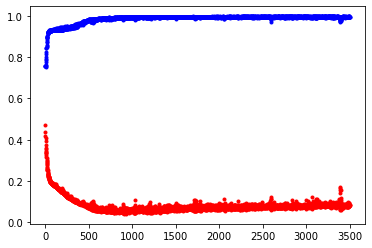

In [124]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt
import os

seed = 0
numpy.random.seed(seed)  # seed 값 설정
tf.set_random_seed(seed)

df_pre = pd.read_csv('./dataset/wine.csv', header=None)
df = df_pre.sample(frac=0.15)  #rac = 1 지정은 원본 데이터의 100%를 불러오라는 의미
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

model = Sequential() # 모델 설정(4개의 은닉층을 만들어 각각 30, 12, 8, 1개의 노드를 주었습니다)
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
from keras.callbacks import ModelCheckpoint

# 모델 컴파일
model.compile(loss='binary_crossentropy',   optimizer='adam',    metrics=['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

#테스트 오차는 케라스 내부에서 val_loss, 학습 정확도는 acc, 테스트셋 정확도는 val_acc, 학습셋 오차는 loss로 각각 기록됩니다
# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)


history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

# y_vloss에 테스트셋(33%)으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc에 학습셋(67%)으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

### 과적합 문제가 발생했다고 판단되면 학습 중단

In [126]:
from keras.callbacks import EarlyStopping

#자동 중단 설정 EarlyStopping() 함수에 모니터할 값(monitor)과 테스트 오차가 좋아지지 않아도 몇 번까지 기다릴 것인지(patience)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 100)

#모델 실행
model.fit(X, Y, validation_split = 0.2, epochs = 2000, batch_size = 500, callbacks = [early_stopping_callback])

#결과 출력
print('\n Accuracy: %.4f' % (model.evaluate(X, Y)[1]))

Train on 780 samples, validate on 195 samples
Epoch 1/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.0399 - val_accuracy: 0.9846
Epoch 2/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0095 - accuracy: 0.9962 - val_loss: 0.0401 - val_accuracy: 0.9846
Epoch 3/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0093 - accuracy: 0.9974 - val_loss: 0.0455 - val_accuracy: 0.9897
Epoch 4/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0084 - accuracy: 0.9987 - val_loss: 0.0430 - val_accuracy: 0.9897
Epoch 5/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.0403 - val_accuracy: 0.9846
Epoch 6/2000
780/780 [==============================] - 0s 12us/step - loss: 0.0083 - accuracy: 0.9974 - val_loss: 0.0407 - val_accuracy: 0.9846
Epoch 7/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0082 - a

Epoch 57/2000
780/780 [==============================] - 0s 11us/step - loss: 0.0089 - accuracy: 0.9974 - val_loss: 0.0445 - val_accuracy: 0.9897
Epoch 58/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0405 - val_accuracy: 0.9846
Epoch 59/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0087 - accuracy: 0.9974 - val_loss: 0.0406 - val_accuracy: 0.9846
Epoch 60/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0094 - accuracy: 0.9974 - val_loss: 0.0445 - val_accuracy: 0.9897
Epoch 61/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0080 - accuracy: 0.9987 - val_loss: 0.0436 - val_accuracy: 0.9897
Epoch 62/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0413 - val_accuracy: 0.9846
Epoch 63/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0086 - accuracy: 0.9974 - val_loss: 0.0411 - val_

780/780 [==============================] - 0s 9us/step - loss: 0.0090 - accuracy: 0.9974 - val_loss: 0.0448 - val_accuracy: 0.9897
Epoch 114/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0074 - accuracy: 0.9987 - val_loss: 0.0420 - val_accuracy: 0.9846
Epoch 115/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0106 - accuracy: 0.9962 - val_loss: 0.0421 - val_accuracy: 0.9846
Epoch 116/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.0536 - val_accuracy: 0.9897
Epoch 117/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0104 - accuracy: 0.9974 - val_loss: 0.0538 - val_accuracy: 0.9897
Epoch 118/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0085 - accuracy: 0.9987 - val_loss: 0.0431 - val_accuracy: 0.9846
Epoch 119/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0096 - accuracy: 0.9962 - val_loss: 0.0452 - val_accurac